<center><img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" /></center>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 Aprendizaje Automático </h1>

<H3 align='center'> Tarea/Taller 1 </H3>
<hr style="height:2px;border:none"/>


# Temas

* Clasificadores Discriminativos Clásicos
* Clasificadores Generativos Clásicos
* Evaluación de Clasificadores


# Reglas & Formalidades

* Pueden trabajar en equipos de 2 a 3 personas. 
* Los equipos deben ser inscritos antes del 24 Septiembre.
* Pueden reusar código visto en clases y/o recolectar código/ideas de otros sitios, mencionando al autor y entregando un link a la fuente. 
* Si resulta necesaria, la intervención de personas ajenas al grupo (e.g. experto) debe ser declarada y justificada.
* Tener roles dentro del equipo está bien, pero al final del proceso, cada miembro debe entender y estar en condiciones de exponer todo el trabajo realizado. 


## Entregables 




> * **Video:** Se debe preparar un video explicativo de **15 a 20 minutos** donde se describe la metodología utilizada, los resultados obtenidos y las conclusiones de la experiencia. 

> * **Código:** Se debe enviar un jupyter notebook con el código utilizado, de modo que sea posible **reproducir los resultados** presentados. Como alternativa, se puede entregar un link Github con el código fuente, incluyendo instrucciones precisas para ejecutar los experimentos. En cualquier caso (notebook o repo) el código debe estar ordenado y seccionado apropiadamente.

> * **Conformidad Ética:** Se debe incluir una breve declaración ética en que se indique que el trabajo que se está enviando es un trabajo original, desarollado por los autores en conformidad con todas reglas antes mencionadas. Se debe también mencionar brevemente cuál fue la contribución de cada miembro del equipo. La declaración puede ser parte del notebook o estar en un archivo dentro del repo.

> * **Defensa en vivo (video-conferencia):** El día de clases agendado para la discusión del taller, se seleccionarán aleatoriamente algunos equipos que presentarán oralmente su trabajo ante el curso. Los autores serán evaluados considerando la discusión y debate que generen entre sus pares. Los puntos obtenidos (positivos o negativos) se sumarán a la nota final de taller.

## Fechas

> * Defensas: 15 de Octubre, horario de clases.
> * Fecha de entrega de vídeo: 16 de Octubre 23:59 Hrs. (1 días después de encuentro).
> * Fecha de entrega de Jupyter (notebook): 15 de Octubre 08:00 (se pueden hacer actualizaciones hasta el 16 de Octubre 23:59 Hrs.). 



# Instrucciones

La tarea se divide en dos secciones:



> **1. Pregunta de Investigación**. Para esta parte, los autores deben elegir una hipótesis de investigación y diseñar un procedimiento experimental que permita reunir evidencia en contra o a favor de la misma. Es legítimo tomar una posición *a-priori* en base a lo que han aprendido en el curso, pero es importante analizar críticamente los resultados sin descartar hipótesis alternativas. 

> La metodología debe incluir al menos 3 datasets, de los cuales al menos 2 deben ser reales. Es deseable también que incluyan experimentos controlados sobre dataset sintéticos o semi-sintéticos no triviales diseñados por ustedes. Por ejemplo, para demostrar que un método logra ignorar variables irrelevantes se podrían crear variables "fake" manualmente. Experimentos de este último tipo que se basen en un dataset real contarán como realizados sobre "dataset reales".

> Si no es relevante para la pregunta de investigación y en honor al tiempo, no es necesario llevar a cabo un análisis exploratorio detallado sobre cada dataset utilizado.

>  **2. Desafío Kaggle**. Para esta parte, los autores enfrentarán un desafío en la plataforma Kaggle y serán calificados en base a su posición en el tablero de resultados y el puntaje obtenido.





<hr style="height:2px;border:none"/>


# Conformidad Ética

En esta evaluación no hubo copia de ninguna clase en la realización de esta tarea. Además, a lo largo de la realización del trabajo se hizo en equipo, distribuyendo la carga de forma equitativa entre los integrantes.

<hr style="height:2px;border:none"/>


# Parte 1. Pregunta de Investigación

Reuna evidencia experimental para refutar o sostener una de las siguientes hipótesis u afirmaciones (máximo 2 equipos por hipótesis).

Elegir tema acá **usando el nombre del equipo**:

https://doodle.com/poll/qgw7h5xb72khqq9x?utm_source=poll&utm_medium=link


> **10. Entre LDA y QDA.** Un "híbrido" LDA/QDA supera tanto a QDA como a LDA.

> Definición del Híbrido: denotemos por $\hat{\Sigma}_k$ las matrices de covarianza obtenidas por QDA y por $\hat{\Sigma}$ la (única) matriz de covarianza obtenida por LDA. El híbrido se define como un clasificador gausiano que usa $\hat{\Sigma}_{k} = (1-\lambda) \hat{\Sigma}_k + \lambda \hat{\Sigma}$ como matriz de covarianza para cada clase ($\lambda$ debe ser seleccionado para cada problema).

Estudiar el híbrido como un clasificador gaussiano implica asociar una combinación convexa al fitting del nuevo modelo. Para ello ocuparemos una función de verosimilitud para el nuevo predictor con un $\lambda$ escogido previamente a cada problema.

$$\delta_k(x)=-\frac{1}{2}(x-\mu_k)^T\hat{\sum}_k^{-1}(x-\mu_k)-\frac{1}{2}log|\hat{\sum}_k|+log\pi_k$$

Utilizaremos los siguientes conjuntos de datos:



*   [IMDB Review Dataset](https://www.kaggle.com/utathya/imdb-review-dataset).
*   [Credit Card Fraud Detection Using scikit-learn](https://www.kaggle.com/chasekregor/credit-card-fraud-detection-using-scikit-learn/data).
*    Conjunto de datos sintéticos generados con ```make_blobs```.





# Problema 1: IMDB Review Dataset.

In [ ]:
print("Mounting your Google Drive ...")

from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=True)
 
path = "/content/drive/My Drive/clases-II-2021/Machine-Learning/datasets/taller01/"#Esta es la ruta

name = 'imdb_master.csv' 

Mounting your Google Drive ...
Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


Index(['type', 'review', 'label', 'file'], dtype='object')
        type  ...         file
10389   test  ...   8100_2.txt
86822  train  ...  43140_0.txt
34066  train  ...   6910_2.txt
26778  train  ...  11600_3.txt
41825  train  ...  2643_10.txt

[5 rows x 4 columns]




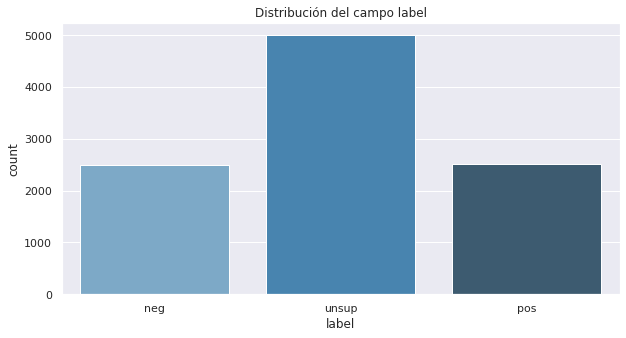

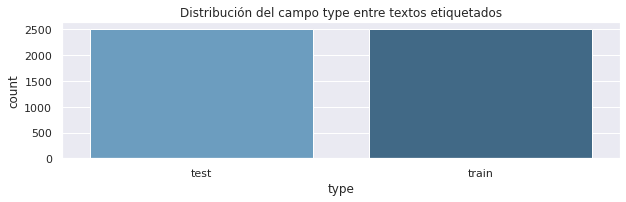



(2510, 2) (2502, 2)


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

data = pd.read_csv(path+name,encoding='latin-1', index_col = 0)
data = data.dropna()
data = data.sample(n=10000,replace=True)

print(data.columns)
print(data.head())

print("\n")
fig, ax = plt.subplots(figsize=(10,5),nrows=1)
sns.countplot(data['label'],palette="Blues_d")
ax.set_title('Distribución del campo label')
plt.show()

data_labelled = data[data.label != 'unsup'].reset_index(drop=True)

print("\n")
fig, ax = plt.subplots(figsize=(10,2.5),nrows=1)
sns.countplot(data_labelled['type'],palette="Blues_d")
ax.set_title('Distribución del campo type entre textos etiquetados')
plt.show()


data_train = data[["review", "label"]][(data.type == 'train') & (data.label != 'unsup')].reset_index(drop=True)
data_test = data[["review", "label"]][(data.type == 'test') & (data.label != 'unsup')].reset_index(drop=True)

print("\n")
print(data_train.shape,data_test.shape)

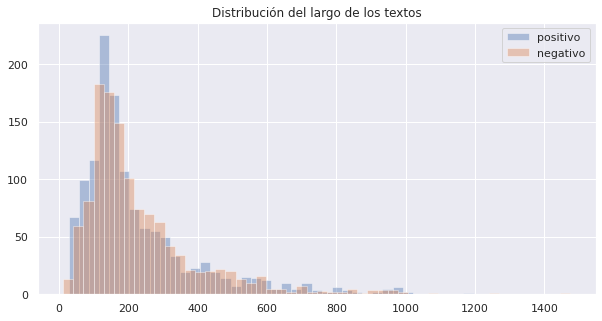

In [ ]:
lenghts_pos = []
lenghts_neg = []

for sentence,label in zip(data_train['review'],data_train['label']):
  if label == 'neg':
    lenghts_neg.append(len(sentence.lower().split()))
  if label == 'pos':
    lenghts_pos.append(len(sentence.lower().split()))

print("\n")
fig, ax = plt.subplots(figsize=(10,5),nrows=1)
sns.distplot(lenghts_pos,hist=True, kde=False, norm_hist=False, label='positivo',ax=ax)
sns.distplot(lenghts_neg,hist=True, kde=False, norm_hist=False, label='negativo',ax=ax)
ax.set_title('Distribución del largo de los textos')
ax.legend()
plt.show()

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 

tokenizer = TfidfVectorizer().build_tokenizer()#Return a function that splits a string into a sequence of tokens considering unicode characters
stemmer = SnowballStemmer("english") 
lemmatizer = WordNetLemmatizer()

##stop-words: el vectorizador ya las remueve pero para mostrar las palabras más frecuente tiene sentido activarlo
remove_stops_here = True

def my_pre_processer(text):
    results = []
    for token in tokenizer(text):
        clean_token = token.lower().strip().strip('-').strip('_')
        if remove_stops_here and (clean_token in stopwords.words('english')):
          continue
        #token_pro = stemmer.stem(clean_token) #podemos probar stemming en vez de lematizacion
        token_pro = lemmatizer.lemmatize(clean_token) 
        if len(token_pro) > 2 and not token_pro[0].isdigit(): #elimina palabra largo menor a 2
            results.append(token_pro)
    return results


my_pre_processer(data_train['review'].values[0])

data_train['prep_review'] = data_train['review'].apply(my_pre_processer)
print(data_train['prep_review'])
print("\n")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
0       [never, actually, seen, film, tell, one, thing...
1       [success, part, another, sequel, natural, move...
2       [really, say, much, plot, movie, already, said...
3       [yes, kazaam, one, horribly, bad, movie, almos...
4       [anticipated, various, sci, thriller, type, mo...
                              ...                        
2505    [watching, five, across, eye, gotta, honest, l...
2506    [saw, movie, premiere, mtv, must, say, extreme...
2507    [cowboy, sympathetic, plight, nearby, indian, ...
2508    [remember, seeing, one, seven, eight, must, fo...
2509    [quite, frankly, seemed, like, seven, hour, bo...
Name: prep_review, Length: 2510, dtype: object




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

max_features = 2000
max_df=0.8
min_df=2

### NUMBER OF N GRAMS TO CONSIDER
ngram_max = 5

vectorizer = CountVectorizer(stop_words='english',tokenizer=my_pre_processer,min_df=min_df, max_df=max_df, max_features=max_features,
                              binary=True, ngram_range=(1, ngram_max))


vectorizer.fit(data_train['review'])
binary_train = vectorizer.transform(data_train['review'])
binary_test = vectorizer.transform(data_test['review'])

print(binary_train.shape,binary_test.shape)

(2510, 2000) (2502, 2000)


In [ ]:
y_train = data_train['label']
y_test = data_test['label']
X_test= binary_test.todense()
X_train= binary_train.todense()

In [ ]:
y_train

0       neg
1       neg
2       pos
3       neg
4       neg
       ... 
2505    neg
2506    neg
2507    neg
2508    pos
2509    neg
Name: label, Length: 2510, dtype: object

In [ ]:
np.shape(X_train)

(2510, 2000)

In [ ]:
y_train_bin=[]
for i in range(len(y_train)):
  if y_train[i]=='pos':
    y_train_bin.append(1)
  else:
    y_train_bin.append(0)

In [ ]:
y_test_bin=[]
for i in range(len(y_test)):
  if y_test[i]=='pos':
    y_test_bin.append(1)
  else:
    y_test_bin.append(0)
len(y_test_bin)

2502

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# graficar curva roc
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(9,4))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
def summary_metrics(df) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['accuracy'] = [round(accuracy_score(y_true,y_pred),4)]
    df_result['recall'] = [round(recall_score(y_true,y_pred, average="macro"),4)]
    df_result['precision'] = [round(precision_score(y_true,y_pred, average="macro"),4)]
    df_result['fscore'] = [round(f1_score(y_true,y_pred, average="macro"),4)]


    return df_result

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train,y_train_bin)
y_pred_lda=lda.predict(X_test)

In [ ]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_test_bin,y_pred_lda))

df_temp = pd.DataFrame(
    {
        'y':y_test_bin,
        'yhat':y_pred_lda
        }
  )
print('\nMétricas de LDA:\n')
print(summary_metrics(df_temp))


Matriz de confusion:
 
[[788 470]
 [406 838]]

Métricas de LDA:

   accuracy  recall  precision  fscore
0    0.6499    0.65     0.6503  0.6497


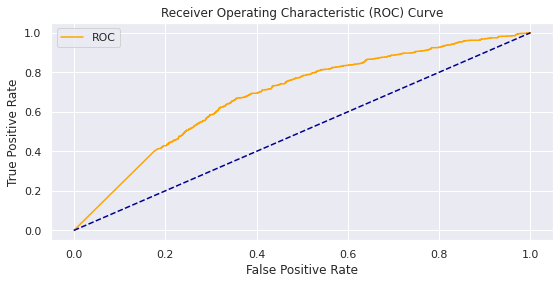

In [ ]:
#Curva ROC para LDA
probs = lda.predict_proba(X_test) # predecir probabilidades para X_test
probs_tp = probs[:, 1] # mantener solo las probabilidades de la clase positiva 
# calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test_bin, probs_tp) # obtener curva ROC
plot_roc_curve(fpr, tpr)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda=QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train,y_train_bin)
y_pred_qda=qda.predict(X_test)

In [ ]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_test_bin,y_pred_qda))

df_temp = pd.DataFrame(
    {
        'y':y_test_bin,
        'yhat':y_pred_qda
        }
  )
print('\nMétricas de QDA:\n')
print(summary_metrics(df_temp))


Matriz de confusion:
 
[[1089  169]
 [ 879  365]]

Métricas de QDA:

   accuracy  recall  precision  fscore
0    0.5811  0.5795     0.6184  0.5429


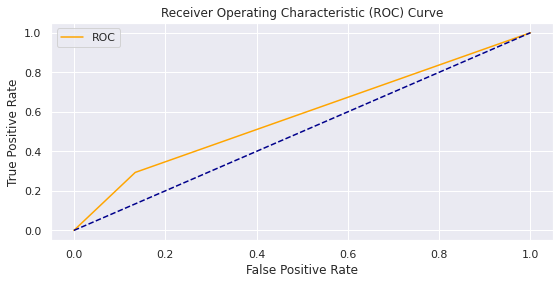

In [ ]:
probs = qda.predict_proba(X_test) # predecir probabilidades para X_test
probs_tp = probs[:, 1] # mantener solo las probabilidades de la clase positiva 
# calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test_bin, probs_tp) # obtener curva ROC
plot_roc_curve(fpr, tpr)

In [ ]:
def convex_cov(S_lda, S_qda, l):
  S_hqda = np.array(S_qda)*(1-l) + l*np.array(S_lda)
  return(S_hqda)

In [ ]:
def rda(X_test, y_test, alpha, cov_lda, cov_qda):
  H=convex_cov(cov_lda,cov_qda,alpha)
  u1,s1,vh1=np.linalg.svd(H[0])
  u2,s2,vh2=np.linalg.svd(H[1])
  qda.scalings_[0]=s1
  qda.scalings_[1]=s2
  qda.rotations_[0]=u1
  qda.rotations_[1]=u2
  y_pred_rda = qda.predict(X_test)
  print(type(y_pred_rda[1500]))
  #accuracy=accuracy_score(y_pred_rda, y_test)
  #precision=precision_score(y_pred_rda, y_test)
  #f_score=f1_score(y_pred_rda, y_test)
  #recall= recall_score(y_pred_rda, y_test)
  
  df_temp = pd.DataFrame(
    {
        'y':y_test_bin,
        'yhat':y_pred_rda
        }
  )
  df_metrics = summary_metrics(df_temp)
  print('\nPara alpha = ', alpha,'se tiene:\n')
  print(df_metrics)

In [ ]:
cov_lda=lda.covariance_
cov_qda=qda.covariance_

In [ ]:
from numpy import linalg
parametros = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
for i in parametros:
  rda(X_test=X_test,y_test=y_test_bin, alpha=i, cov_lda=cov_lda, cov_qda=cov_qda)

<class 'numpy.int64'>

Para alpha =  0 se tiene:

   accuracy  recall  precision  fscore
0    0.7362  0.7351     0.7763  0.7257
<class 'numpy.int64'>

Para alpha =  0.05 se tiene:

   accuracy  recall  precision  fscore
0    0.5955  0.5974     0.6698  0.5482
<class 'numpy.int64'>

Para alpha =  0.1 se tiene:

   accuracy  recall  precision  fscore
0    0.6007  0.6025     0.6665  0.5591
<class 'numpy.int64'>

Para alpha =  0.15 se tiene:

   accuracy  recall  precision  fscore
0    0.6039  0.6056     0.6634  0.5663
<class 'numpy.int64'>

Para alpha =  0.2 se tiene:

   accuracy  recall  precision  fscore
0    0.6063  0.6079       0.66  0.5722
<class 'numpy.int64'>

Para alpha =  0.25 se tiene:

   accuracy  recall  precision  fscore
0    0.6095  0.6111     0.6588  0.5785
<class 'numpy.int64'>

Para alpha =  0.3 se tiene:

   accuracy  recall  precision  fscore
0    0.6103  0.6118     0.6572  0.5807
<class 'numpy.int64'>

Para alpha =  0.35 se tiene:

   accuracy  recall  precision  fsco

# Problema 2: Credit Card Fraud Detection Using scikit-learn.

In [ ]:
print("Mounting your Google Drive ...")

from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=True)
 
path = "/content/drive/My Drive/clases-II-2021/Machine-Learning/datasets/taller01/"#Esta es la ruta

name = 'creditcard.csv' 

Mounting your Google Drive ...
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

data = pd.read_csv(path+name,sep=';')
data = data.dropna()
print(data.columns)
data.head()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
2,10.0,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,1.323729,0.227666,-0.242682,1.205417,-0.317631,0.725675,-0.815612,0.873936,-0.847789,-0.683193,-0.102756,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0
3,10.0,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,0.309755,-0.259116,-0.326143,-0.090047,0.362832,0.928904,-0.129487,-0.809979,0.359985,0.707664,0.125992,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,0
4,12.0,1.103215,-0.040296,1.267332,1.289091,-0.735997,0.288069,-0.586057,0.189380,0.782333,-0.267975,-0.450311,0.936708,0.708380,-0.468647,0.354574,-0.246635,-0.009212,-0.595912,-0.575682,-0.113910,-0.024612,0.196002,0.013802,0.103758,0.364298,-0.382261,0.092809,0.037051,12.99,0


In [ ]:
#tamaño del dataset
np.shape(data)

(50492, 31)

In [ ]:
# calcular proporciones
df_count = pd.DataFrame()
df_count["fraude"] =["no","si"]
df_count["total"] = data["Class"].value_counts() 
df_count["porcentaje"] = 100*df_count["total"] /df_count["total"] .sum()

df_count

,fraude,total,porcentaje
0,no,50000,99.025588
1,si,492,0.974412


In [ ]:
# datos 
y = data.Class
X = data.drop('Class', axis=1)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# graficar curva roc
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(9,4))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
def summary_metrics(df) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['accuracy'] = [round(accuracy_score(y_true,y_pred),4)]
    df_result['recall'] = [round(recall_score(y_true,y_pred, average="macro"),4)]
    df_result['precision'] = [round(precision_score(y_true,y_pred, average="macro"),4)]
    df_result['fscore'] = [round(f1_score(y_true,y_pred, average="macro"),4)]


    return df_result

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train,y_train)
y_pred_lda=lda.predict(X_test)

In [ ]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_test,y_pred_lda))

df_temp=df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat':y_pred_lda
        }
  )
print('\nMétricas de LDA:\n')
print(summary_metrics(df_temp))


Matriz de confusion:
 
[[12485     2]
 [   30   106]]

Métricas de LDA:

   accuracy  recall  precision  fscore
0    0.9975  0.8896     0.9895  0.9338


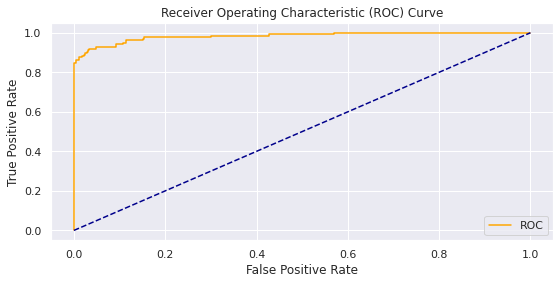

In [ ]:
#Curva ROC para LDA
probs = lda.predict_proba(X_test) # predecir probabilidades para X_test
probs_tp = probs[:, 1] # mantener solo las probabilidades de la clase positiva 
# calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probs_tp) # obtener curva ROC
plot_roc_curve(fpr, tpr)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda=QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train,y_train)
y_pred_qda=qda.predict(X_test)

In [ ]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_test,y_pred_qda))

df_temp=df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat':y_pred_qda
        }
  )
print('\nMétricas para QDA:\n')
print(summary_metrics(df_temp))


Matriz de confusion:
 
[[12142   345]
 [   19   117]]

Métricas para QDA:

   accuracy  recall  precision  fscore
0    0.9712  0.9163     0.6258  0.6883


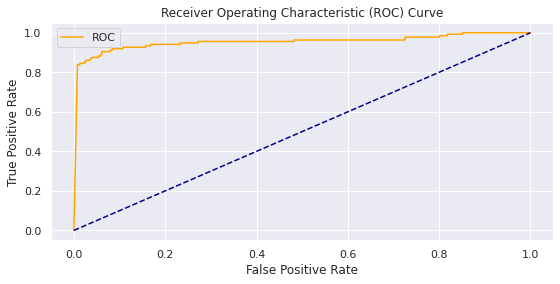

In [ ]:
probs = qda.predict_proba(X_test) # predecir probabilidades para X_test
probs_tp = probs[:, 1] # mantener solo las probabilidades de la clase positiva 
# calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probs_tp) # obtener curva ROC
plot_roc_curve(fpr, tpr)

In [ ]:
def convex_cov(S_lda, S_qda, l):
  S_hqda = np.array(S_qda)*(1-l) + l*np.array(S_lda)
  return(S_hqda)

In [ ]:
def rda(X_test, y_test, alpha, cov_lda, cov_qda):
  H=convex_cov(cov_lda,cov_qda,alpha)
  u1,s1,vh1=np.linalg.svd(H[0])
  u2,s2,vh2=np.linalg.svd(H[1])
  qda.scalings_[0]=s1
  qda.scalings_[1]=s2
  qda.rotations_[0]=u1
  qda.rotations_[1]=u2
  y_pred_rda = qda.predict(X_test)
  accuracy=accuracy_score(y_pred_rda, y_test)
  precision=precision_score(y_pred_rda, y_test)
  f_score=f1_score(y_pred_rda, y_test)
  recall= recall_score(y_pred_rda, y_test)
  df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat':y_pred_rda
        }
  )
  df_metrics = summary_metrics(df_temp)
  print('\nPara alpha = ', alpha,'se tiene:\n')
  print(df_metrics)

In [ ]:
cov_lda=lda.covariance_
cov_qda=qda.covariance_

In [ ]:
from numpy import linalg
parametros = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
for i in parametros:
  rda(X_test=X_test,y_test=y_test, alpha=i, cov_lda=cov_lda, cov_qda=cov_qda)


Para alpha =  0 se tiene:

   accuracy  recall  precision  fscore
0    0.9712  0.9163     0.6258  0.6883

Para alpha =  0.05 se tiene:

   accuracy  recall  precision  fscore
0    0.9703  0.9159     0.6229  0.6845

Para alpha =  0.1 se tiene:

   accuracy  recall  precision  fscore
0    0.9701  0.9158     0.6221  0.6835

Para alpha =  0.15 se tiene:

   accuracy  recall  precision  fscore
0    0.9693  0.9154     0.6198  0.6805

Para alpha =  0.2 se tiene:

   accuracy  recall  precision  fscore
0    0.9689  0.9152     0.6186  0.6789

Para alpha =  0.25 se tiene:

   accuracy  recall  precision  fscore
0    0.9688  0.9151     0.6181  0.6783

Para alpha =  0.3 se tiene:

   accuracy  recall  precision  fscore
0    0.9689  0.9188     0.6189  0.6796

Para alpha =  0.35 se tiene:

   accuracy  recall  precision  fscore
0    0.9688  0.9188     0.6187  0.6793

Para alpha =  0.4 se tiene:

   accuracy  recall  precision  fscore
0    0.9688  0.9188     0.6187  0.6793

Para alpha =  0.45 se tie

# Problema 3: Datos sintéticos.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from numpy import linalg
from sklearn.datasets import make_classification

In [ ]:
X,y = make_classification(n_samples=10000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0,weights=[0.5,0.5], random_state=17)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

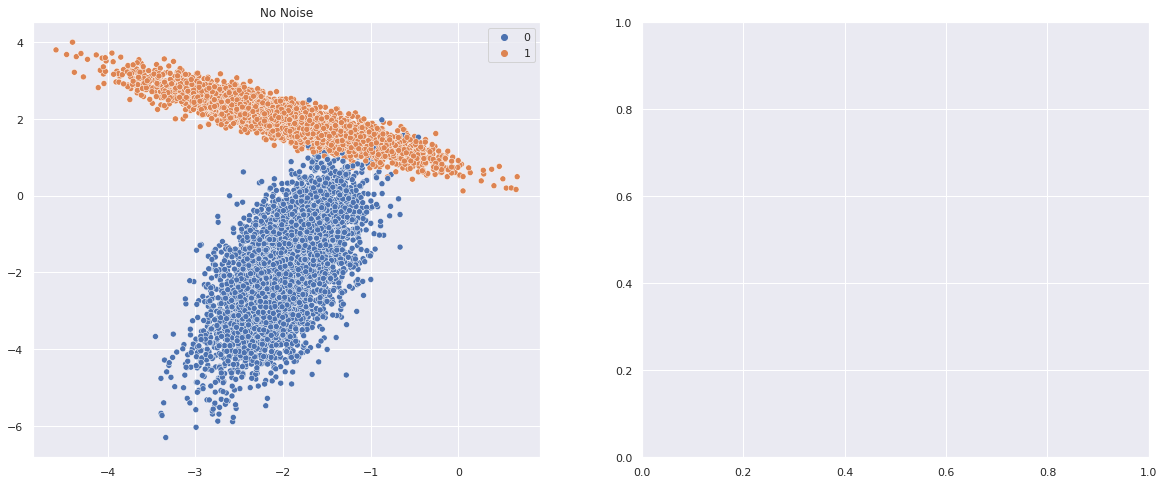

In [ ]:
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
ax1.set_title("No Noise");

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(9,4))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
def summary_metrics(df) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['accuracy'] = [round(accuracy_score(y_true,y_pred),4)]
    df_result['recall'] = [round(recall_score(y_true,y_pred, average="micro"),4)]
    df_result['precision'] = [round(precision_score(y_true,y_pred, average="micro"),4)]
    df_result['fscore'] = [round(f1_score(y_true,y_pred, average="micro"),4)]


    return df_result

In [ ]:
lda=LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train,y_train)
y_pred_lda=lda.predict(X_test)

In [ ]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_test,y_pred_lda))

df_temp=df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat':y_pred_lda
        }
  )
print('\nMétricas de LDA:\n')
print(summary_metrics(df_temp))


Matriz de confusion:
 
[[1138   74]
 [   0 1288]]

Métricas de LDA:

   accuracy  recall  precision  fscore
0    0.9704  0.9704     0.9704  0.9704


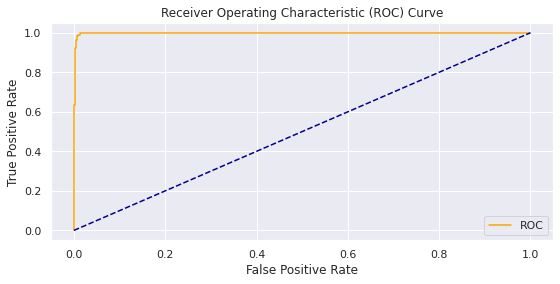

In [ ]:
probs = lda.predict_proba(X_test) # predecir probabilidades para X_test
probs_tp = probs[:, 1] # mantener solo las probabilidades de la clase positiva 
# calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probs_tp) # obtener curva ROC
plot_roc_curve(fpr, tpr)

In [ ]:
qda=QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train,y_train)
y_pred_qda=qda.predict(X_test)

In [ ]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_test,y_pred_qda))

df_temp=df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat':y_pred_qda
        }
  )
print('\nMétricas para QDA:\n')
print(summary_metrics(df_temp))


Matriz de confusion:
 
[[1203    9]
 [   1 1287]]

Métricas para QDA:

   accuracy  recall  precision  fscore
0     0.996   0.996      0.996   0.996


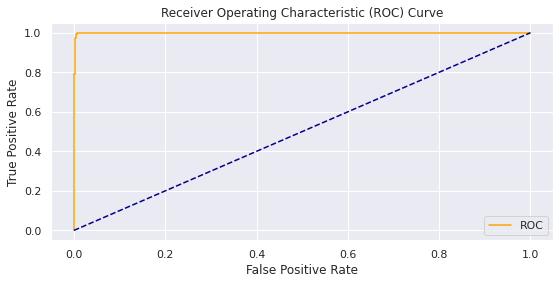

In [ ]:
probs = qda.predict_proba(X_test) # predecir probabilidades para X_test
probs_tp = probs[:, 1] # mantener solo las probabilidades de la clase positiva 
# calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probs_tp) # obtener curva ROC
plot_roc_curve(fpr, tpr)

In [ ]:
def convex_cov(S_lda, S_qda, l):
  S_hqda = np.array(S_qda)*(1-l) + l*np.array(S_lda)
  return(S_hqda)

In [ ]:
def rda(X_test, y_test, alpha, cov_lda, cov_qda):
  H=convex_cov(cov_lda,cov_qda,alpha)
  u1,s1,vh1=np.linalg.svd(H[0])
  u2,s2,vh2=np.linalg.svd(H[1])
  qda.scalings_[0]=s1
  qda.scalings_[1]=s2
  qda.rotations_[0]=u1
  qda.rotations_[1]=u2
  y_pred_rda = qda.predict(X_test)
  df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat':y_pred_rda
        }
  )
  df_metrics = summary_metrics(df_temp)
  print('\nPara alpha = ', alpha,'se tiene:\n')
  print(df_metrics)

In [ ]:
cov_lda=lda.covariance_
cov_qda=qda.covariance_

In [ ]:
from numpy import linalg
parametros = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
for i in parametros:
  rda(X_test=X_test,y_test=y_test, alpha=i, cov_lda=cov_lda, cov_qda=cov_qda)


Para alpha =  0 se tiene:

   accuracy  recall  precision  fscore
0     0.996   0.996      0.996   0.996

Para alpha =  0.05 se tiene:

   accuracy  recall  precision  fscore
0    0.9944  0.9944     0.9944  0.9944

Para alpha =  0.1 se tiene:

   accuracy  recall  precision  fscore
0    0.9924  0.9924     0.9924  0.9924

Para alpha =  0.15 se tiene:

   accuracy  recall  precision  fscore
0    0.9916  0.9916     0.9916  0.9916

Para alpha =  0.2 se tiene:

   accuracy  recall  precision  fscore
0    0.9908  0.9908     0.9908  0.9908

Para alpha =  0.25 se tiene:

   accuracy  recall  precision  fscore
0    0.9904  0.9904     0.9904  0.9904

Para alpha =  0.3 se tiene:

   accuracy  recall  precision  fscore
0    0.9896  0.9896     0.9896  0.9896

Para alpha =  0.35 se tiene:

   accuracy  recall  precision  fscore
0    0.9888  0.9888     0.9888  0.9888

Para alpha =  0.4 se tiene:

   accuracy  recall  precision  fscore
0    0.9868  0.9868     0.9868  0.9868

Para alpha =  0.45 se tie